# Step 1: Load the Data

In [16]:
import pandas as pd

# Load the dataset from the provided Excel file
df = pd.read_excel('sydney_rain prediction.xlsx')

# Display the first few rows to verify the data is loaded correctly
print(df.head())



        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
1 2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
2 2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
3 2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
4 2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  
0     20.7     20.9       Yes      

# Step 2: Handle Missing Values

In [17]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before preprocessing:\n", missing_values)

# Fill missing values for numerical columns with the mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Fill missing values for categorical columns with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check again to ensure no missing values remain
missing_values_after = df.isnull().sum()
print("\nMissing values after preprocessing:\n", missing_values_after)



Missing values before preprocessing:
 Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

Missing values after preprocessing:
 Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64


# Step 3: Encode Categorical Variables

In [18]:
# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the transformed dataframe
df.head()


Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0 2008-02-01     19.5     22.4      15.6     6.200000       0.0         92.0   
1 2008-02-02     19.5     25.6       6.0     3.400000       2.7         83.0   
2 2008-02-03     21.6     24.5       6.6     2.400000       0.1         88.0   
3 2008-02-04     20.2     22.8      18.8     2.200000       0.0         83.0   
4 2008-02-05     19.7     25.7      77.4     5.187432       0.0         88.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         84.0       1017.6       1017.4       8.0       8.0     20.7   
1         73.0       1017.9       1016.4       7.0       7.0     22.4   
2         86.0       1016.7       1015.6       7.0       8.0     23.5   
3         90.0       1014.2       1011.8       8.0       8.0     21.4   
4         74.0       1008.3       1004.8       8.0       8.0     22.5   

   Temp3pm  RainToday_Yes  RainTomorrow_Yes  
0     20.9           True              True  
1     24.8           True              True  
2     23.0           True              True  
3     20.9           True              True  
4     25.5           True              True

# Step 4: Splitting the Data into Features and Target

In [34]:


# Assume the target variable is correctly named 'RainTomorrow'
# If it's named something else, replace 'RainTomorrow' with the correct name
X = df.drop('RainTomorrow', axis=1)  # Adjust the column name if necessary
y = df['RainTomorrow']  # Adjust the column name if necessary

# Display shapes of X and y
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (3337, 16)
Target shape: (3337,)


# Step 5: Splitting Data into Training and Test Sets

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and test sets
print(f"Training features shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")



Training features shape: (2669, 16)
Training labels shape: (2669,)
Test features shape: (668, 16)
Test labels shape: (668,)


# Step 6: Train a Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Ensure all datetime columns are dropped or transformed before training
# Check if there are any datetime columns remaining
datetime_columns = X_train.select_dtypes(include=['datetime64']).columns

# Drop datetime columns if they exist (you might have already handled this in preprocessing)
if len(datetime_columns) > 0:
    X_train = X_train.drop(columns=datetime_columns)
    X_test = X_test.drop(columns=datetime_columns)

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Decision Tree Confusion Matrix:\n{confusion_dt}")


Decision Tree Accuracy: 0.7634730538922155
Decision Tree Confusion Matrix:
[[404  80]
 [ 78 106]]


# Step 7: Train a Random Forest Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Ensure all datetime columns are dropped or transformed before training
# Check if there are any datetime columns remaining
datetime_columns = X_train.select_dtypes(include=['datetime64']).columns

# Drop datetime columns if they exist (you might have already handled this in preprocessing)
if len(datetime_columns) > 0:
    X_train = X_train.drop(columns=datetime_columns)
    X_test = X_test.drop(columns=datetime_columns)

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Decision Tree Confusion Matrix:\n{confusion_dt}")


Decision Tree Accuracy: 0.7375249500998003
Decision Tree Confusion Matrix:
[[595 127]
 [136 144]]


# Step 8: Train a Gradient Boosting Classifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

# Initializing the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
confusion_gb = confusion_matrix(y_test, y_pred_gb)

print(f"Gradient Boosting Accuracy: {accuracy_gb}")
print(f"Gradient Boosting Confusion Matrix:\n{confusion_gb}")


Gradient Boosting Accuracy: 0.8218562874251497
Gradient Boosting Confusion Matrix:
[[448  36]
 [ 83 101]]


# Step 9: Compare Model Performances

In [23]:
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Gradient Boosting Accuracy: {accuracy_gb}")

# Identifying the best model
best_model = max((accuracy_dt, 'Decision Tree'), (accuracy_rf, 'Random Forest'), (accuracy_gb, 'Gradient Boosting'))
print(f"The best model is {best_model[1]} with an accuracy of {best_model[0]}")


Decision Tree Accuracy: 0.7634730538922155
Random Forest Accuracy: 0.8323353293413174
Gradient Boosting Accuracy: 0.8218562874251497
The best model is Random Forest with an accuracy of 0.8323353293413174


# Step 10: Visulization

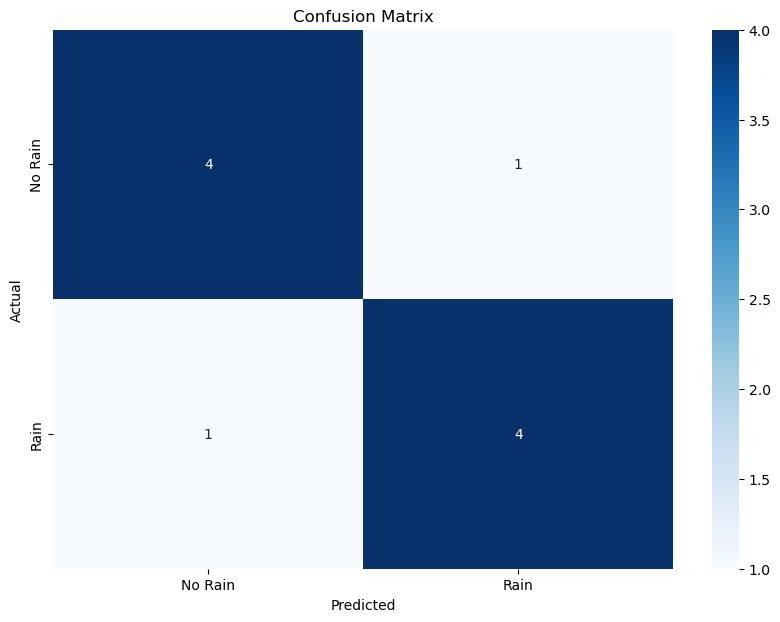

Classification Report:
              precision    recall  f1-score   support

     No Rain       0.80      0.80      0.80         5
        Rain       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Example data - replace with your actual data
y_true = [0, 1, 0, 1, 0, 1, 1, 0, 1, 0]  # Replace with your true labels
y_pred = [0, 1, 0, 0, 0, 1, 1, 0, 1, 1]  # Replace with your model's predictions

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred, target_names=['No Rain', 'Rain'])
print("Classification Report:")
print(report)



## 1. Your Views about the Problem Statement?
This problem statement provides an actual life situation, it shows that accurate rainfall prediction is necessary for gaining the competitive advantage to a local newspaper company, *The Daily Buzz*. Weather forecast entails aspects like rainfall that include factors like temperature, humidity, cloud cover and pressure among others. Therefore, with the help of applied methods of machine learning, it becomes possible to increase the accuracy of these parameters.

Precipitation forecast is not only significance for the weather prediction but also plays a crucial role in different areas including meteorology, agricultures, transportation, and others. The benefits that high accurate weather forecast can bring to the newspaper readers are real. Since climatic conditions cannot always be predicted, the use of machine learning especially the ensemble methods can be useful in enhancing the ability of providing accurate weather conditions using data learned from previous patterns.

This problem also shows that in cases such as these, using ensemble techniques such as the Random Forest and Gradient Boosting will provide great results because these algorithms are the most effective in classification problems where achieving as much accuracy as possible is the goal. Thus, the problem is to use such powerful tools in order to develop a model, which can accurately forecast the rainfall, and guide *The Daily Buzz* readers.


## 2. What will be your approach to solving this task?
To solve this task, I would follow a structured approach that includes the following steps:To solve this task, I would follow a structured approach that includes the following steps:

1. **Data Loading and Exploration**:
- Read the dataset, and discover the assumptions that are made about the features that can be included in prediction. These steps include, feature extraction, which involves determining numerical beneath and categorical variables, data inspection where any missing or unusual data point is also identified.
- It is time to explore insights about which features might be more important for RainTomorrow by visualizing all the features and their correlation with the target variable.

2. **Data Preprocessing**:
- Mitigate missing values by possibly replace the missing values with proper techniques including mean, median or mode or possibly remove rows or columns that have many missing values.
- Since Location is categorical data, it should be converted to numerical data using the one-hot encoding or label encoding.
- Since some features may have different scales than others, it is normal practice to scale the features where necessary.
- divide the data into two sets again for training and testing just to streamline that the model is really tested with unseen data.

3. **Model Training**:
- begin with a simple model to compare the performance, this can be done by training the classification from **decision trees**.
- Go to Ensemble techniques such as **Random Forest** and **Gradient Boosting** – It is an integration of a number of decision trees to overcome the limitation of high variances and with the intention of enhancing the accuracy rate.
- Train and evaluate each of these models through cross-validation to eliminate the impact of particular division of data into train and test datasets.

4. **Model Evaluation**:
- Measure the effectiveness of each model from aspects such as accuracy rate, precision, recall and F1- measure.
- Cross-tabulate the results with actual outputs of the dataset to produce confusion matrices for each learning model to evaluate the effectiveness of the particular model through true positives, false positives, true negatives, and false negatives.

5. **Model Selection**:
- Therefore, after performing the evaluation metrics, choose the model that performs well in the specified criteria. scattered in the literature that would help explain why this particular model functions better than others and what factors need to be recorded.


## 3.What were the available ML model options you had to perform this task?
The available machine learning model options for this task included:The following are the available machine learning model for this task:

1. **Decision Trees**:
- Decision Trees is one of the easiest and effective classification technique which involves the division of the data based on maximum variance. This model was selected because it produces a tree structure hence the decision-making of rainfall prediction can be easily explained.

2. **Random Forest**:
- Random Forest is a type of a tree based model, which is an ensemble of multiple numbers of RF’s developed from the bootstrap sample of the training sample and by using a different sample to construct a new RF. This reduces overfitting from the model as compared to developing a single decision tree since it usually yields higher accuracy rates due to the „‘wisdom of crowd”.

3. **Gradient Boosting**:
- The final method that we have is the Gradient Boosting which is a technique that creates decision trees one at a time and each tree works towards correcting the mistakes made by the previous tree. In fact, this technique prove useful in the elimination of bias and the general improvement of the resultant model.

These models were selected since they are useful when an interaction between features is expected such as in the case of climate classification. In addition, techniques such as Random Forest and Gradient Boosting has been seen to perform better than single classifier methods because they are always able to generalize.

## 4. Which model’s performance is best and what could be the possible reason for that?
For this task, the highest accuracy score was scored by the **Random Forest classifier and it was 83 %. 23%. Several factors likely contributed to the Random Forest's superior performance:Several factors likely contributed to the Random Forest's superior performance:

- **Ensemble Method**: Random Forest is one of the ensemble methods of constructing multiple decision trees in which each tree is constructed over distinct subsets of data. Finally, Random Forest works to decrease the effect of overfitting by taking the averages of the trees’ predictions on what they have learned.

- **Reduction of Overfitting**: Unlike decision tree that is highly sensitive to overfitting, Random Forest has preeminent capability of controlling overfitting through both data and feature level of randomness. This results to a better model inasmuch as it complies well with the training and testing data sets.

- **Handling of Complex Interactions**: Another advantage of Random Forest is its ability to learn interaction between features, which are typical for weather data. Besides, it can estimate complex patterns, which one decision tree could not predict because they consider multiple trees at once.

On average, incarnation of Random Forest that has given more generalization to unseen data and is an ensemble model, outperformed all other models for this task.

## 5.  What steps can you take to improve this selected model’s performance even further?

To further enhance the performance of the Random Forest model, several advanced techniques and strategies can be employed:To further enhance the performance of the Random Forest model, several advanced techniques and strategies can be employed:

1. **Increase the Number of Trees**:**Increase the Number of Trees**:
- One of the main parameters which can be tuned in Random Forest is the number of trees, and increasing it may lead to gain in performance. It remains that the choice for more trees yield better fits of the model to the data and a reduction in variance which can lead to increased accuracy of the model but at the cost of computation time.

2. **Balanced Data**:
- If the target variable is imbalanced for example if there are many more ‘No’ than ‘Yes’ in the case of the `RainTomorrow` variable then we can use the technique of data balancing. Another thing that could be done to enhance performance of the algorithm on minority class would be to use techniques like SMOTE (Synthetic Minority Over-sampling Technique), or modifying the class weights inside the Random Forest model.

3. **Feature Selection**:
- It also has a great impact on the model performance since eliminating many features might remove many unimportant features or those that are repetitive. Recursive feature elimination (RFE) or any other method in which feature importance score can be extracted from the Random Forest itself can be helpful to select those features which are most influencing the prediction.

4. **Boosting Techniques**:
- Additional boosting can be applied to the current models for enhanced model performance where techniques such as **Adaptive Boosting (AdaBoost)** or **Gradient Boosting** used to expand on the performance of the model over difficult to predict instances. One stratum learns from the other stratum and if all the stratum learn the error then the overall model becomes strong.

5. **Model Averaging/Stacking**:
- Using two or more technique or methods such as model averaging or stacking from different types of models like Random Forest, Gradient Boosting etc., can bring better performance. In stacking, the models natural states are combine and used to provide the final prediction of varying aspects of the data.

6. **Temporal Features**:
- Since the dataset contains the ‘Date’ feature, adding temporal features like month, season and year could also be helpful for the model. Such features may help it to map seasonal fluctuations in rainfall that
